# 回帰問題
元ネタ：https://www.amazon.co.jp/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98%E3%81%A8%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-%E4%B8%8B-%E3%83%99%E3%82%A4%E3%82%BA%E7%90%86%E8%AB%96%E3%81%AB%E3%82%88%E3%82%8B%E7%B5%B1%E8%A8%88%E7%9A%84%E4%BA%88%E6%B8%AC-C-M-%E3%83%93%E3%82%B7%E3%83%A7%E3%83%83%E3%83%97/dp/4621061240

## 確率過程の定義
確率過程$y(x)$とは，任意の有限な値集合$y(x_1),...,y(x_N)$に対して，矛盾のない同時分布を与えるもの．

## ガウス過程の定義
関数$y(x)$の上の確率分布として定義され，任意の$x$に対して$y(x)$がガウス分布に従うような確率過程．

## カーネル関数
カーネル関数は，ガウス過程の性質を決定する．

以下でよく用いられるカーネル関数を示す．
$$
k(x,x') = \theta_0 \exp \left\{ -\frac{\theta_1}{2} \| x - x' \|^2 \right\} + \theta_2 + \theta_3 x^T x'
$$

様々なパラメータを設定したときの，ガウス過程による事前分布からのサンプルを示す．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# カーネル関数
def kernel(x1, x2, theta):
    return theta[0] * np.exp(-0.5 * theta[1] * np.linalg.norm(x1 - x2)**2) \
        + theta[2] + theta[3] * np.dot(x1, x2)

In [3]:
# グラム行列（カーネル行列）を計算
def compute_gram_matrix(X, theta):
    n = X.shape[0]
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j], theta)
    return K

In [4]:
# ガウス過程からサンプルを生成
def sample_gp(X, theta, num_samples):
    # グラム行列を計算
    K = compute_gram_matrix(X, theta)

    # ガウス過程からサンプルを生成
    samples = np.random.multivariate_normal(np.zeros(len(X)), K, num_samples)
    
    return samples

In [5]:
# パラメータセット
theta_sets = [
    [1.00, 4.00, 0.00, 0.00],
    [1.00, 0.25, 0.00, 0.00],
    [9.00, 4.00, 0.00, 0.00],
    [1.00, 4.00, 0.00, 0.00],
    [1.00, 64.00, 0.00, 0.00],
    [1.00, 4.00, 0.00, 5.00]
]

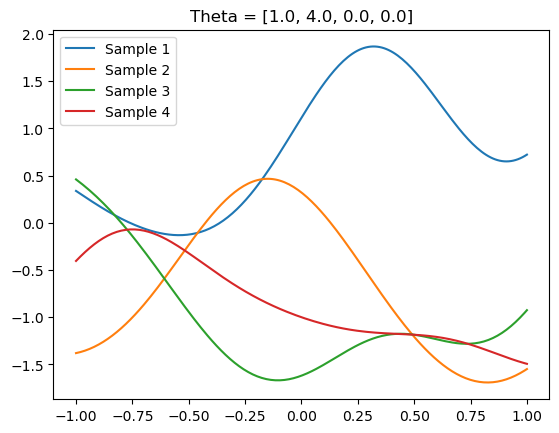

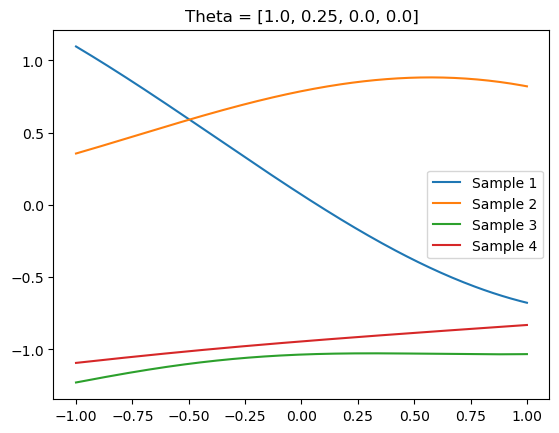

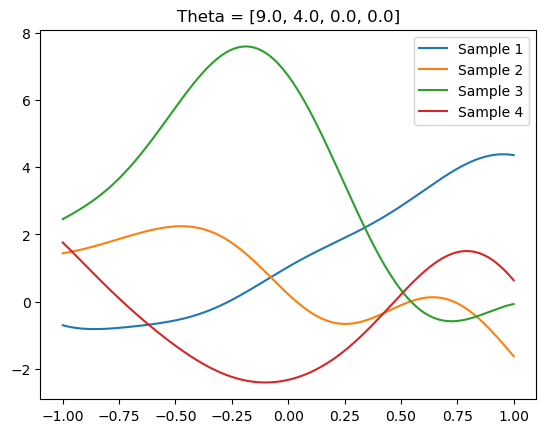

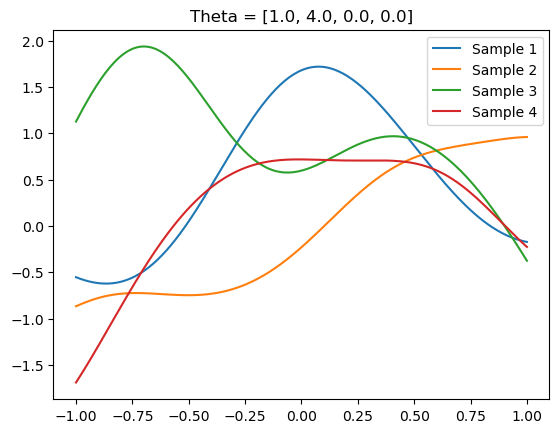

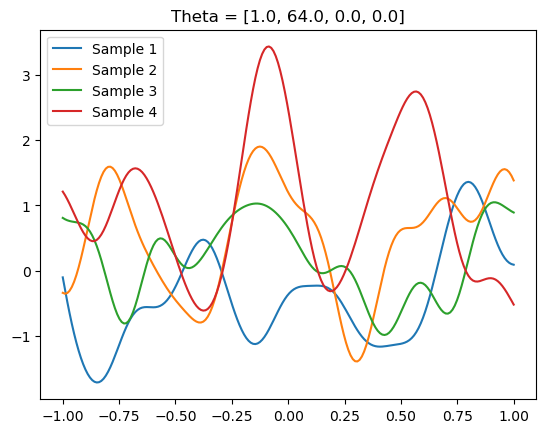

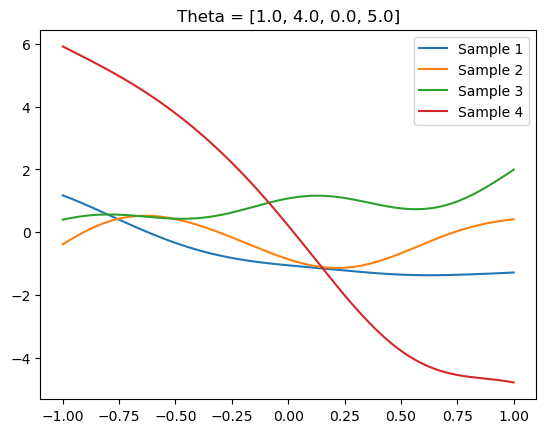

In [6]:
# 入力値
X = np.linspace(-1, 1, 200)

np.random.seed(123)
for i, theta in enumerate(theta_sets, start=1):
    # サンプリング
    samples = sample_gp(X, theta, 4)

    # プロット
    plt.figure(i)
    for j in range(4):
        plt.plot(X, samples[j], label=f'Sample {j+1}')
    plt.title(f'Theta = {theta}')
    plt.legend()

plt.show()

## ガウス過程による回帰
観測される目標変数の値に含まれるノイズを考える．
$$
t_n = y(x_n) + \epsilon_n \\
\epsilon_n = \mathcal{N}(\epsilon_n|0,\beta^{-1})
$$

ノイズは各データ点に対して独立に決定されガウス分布とする．

$y = (y_1,...,y_N)^T$が与えられた下での目標値$t = (t_1,...,t_N)^T$の同時分布は以下の等方的なガウス分布に従う．
$$
p(t|y) = \mathcal{N}(t|y,\beta^{-1}I_N)
$$

ガウス過程の定義から，$y$の同時分布は以下のガウス分布に従う．
$$
p(y) = \mathcal{N}(y|0,K)
$$

ただし，$K$はカーネル行列であり，$K_{nm} = k(x_n,x_m)$である．

入力値$x$が与えられた下での目標値$t$の周辺分布は計算により以下のガウス分布に従う．
$$
p(t) = \mathcal{N}(t|0,C)
$$

ただし，$C = K + \beta^{-1}I_N$である．

予測分布$p(t^*|t)$を求める．

まず，$t^*$と$t$の同時分布$p(t^*,t)$を求める．
$$
p(t^*,t) = \mathcal{N} \left( \left[ \begin{array}{c} t \\ t^*  \end{array} \right] \middle| 0, \left[ \begin{array}{cc} C & k_* \\ k_*^T & c \end{array} \right] \right)
$$

ただし，$[k_*]_{n} = k_{*n} = k(x_*,x_n)$であり，$c = k(x_*,x_*) + \beta^{-1}$である．

ここから，データ点$t$が与えられたときの$t^*$の周辺分布$p(t^*|t)$を求めと
$$
p(t^*|t) = \mathcal{N}(t^*|m(x_*),\sigma^2(x_*))
$$

ただし，$m(x_*) = k_*^T C^{-1} t$，$\sigma^2(x_*) = c - k_*^T C^{-1} k_*$である．

以下で正弦関数データに対してガウス過程による回帰を行う．

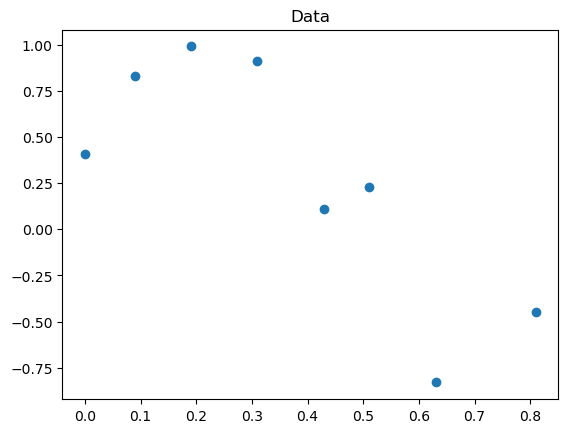

In [7]:
# データの生成
X = np.array([0.00 , 0.09 , 0.19 , 0.31 , 0.43 , 0.51 , 0.63 , 0.81])
y = np.array([0.41 , 0.83 , 0.99 , 0.91 , 0.11 , 0.23 , -0.83 , -0.45])

# プロット
plt.figure(0)
plt.scatter(X, y)
plt.title('Data')
plt.show()

In [8]:
# ガウス過程回帰をクラスでまとめる
class GaussianProcessRegressor:
    def __init__(self, kernel, theta):
        self.kernel = kernel
        self.theta = theta
    # グラム行列（カーネル行列）を計算
    def compute_gram_matrix(self, X1, X2):
        n, m = X1.shape[0], X2.shape[0]
        K = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                K[i, j] = self.kernel(X1[i], X2[j], self.theta)
        return K
    # 学習
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.K = self.compute_gram_matrix(X_train, X_train)
        self.K_inv = np.linalg.inv(self.K + 1e-6 * np.eye(len(self.K)))  # Regularization
    # 予測
    def predict(self, X_test):
        k = self.compute_gram_matrix(X_test, self.X_train)
        mu = k @ self.K_inv @ self.y_train
        var = np.diag(self.kernel(X_test, X_test, self.theta) - k @ self.K_inv @ k.T)
        return mu, var

In [9]:
# Kernel function
def kernel(x1, x2, theta):
    return theta[0] * np.exp(-0.5 * theta[1] * np.linalg.norm(x1 - x2)**2) \
        + theta[2] + theta[3] * np.dot(x1, x2)

# Parameter
theta = [1.00, 1.00, 0.00, 0.01]

In [10]:
# Test data
X_test = np.linspace(0, 1, 100)

In [11]:
# Create Gaussian process regressor and fit to data
gpr = GaussianProcessRegressor(kernel, theta)
gpr.fit(X, y)

In [12]:
# Predict using the GPR
mu, var = gpr.predict(X_test)
stdv = np.sqrt(var)

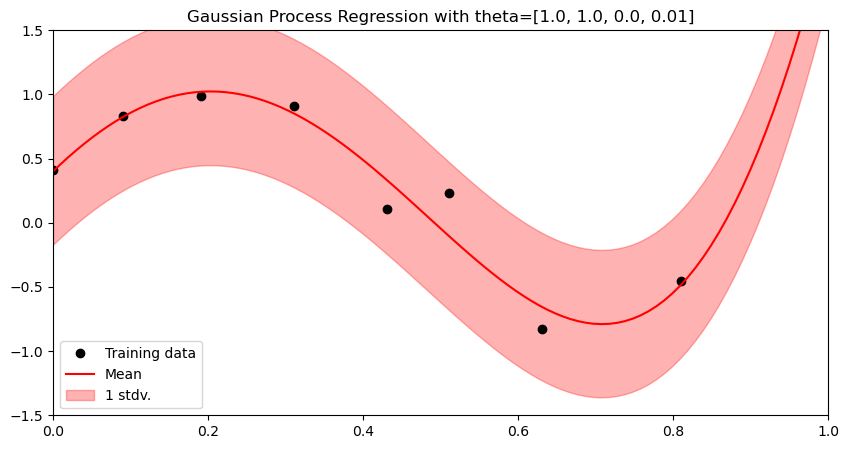

In [13]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'ko', label='Training data')
plt.plot(X_test, mu, 'r', label='Mean')
plt.fill_between(X_test, mu - stdv, mu + stdv, color='r', alpha=0.3, label='1 stdv.')
plt.title(f'Gaussian Process Regression with theta={theta}')
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

## ハイパーパラメータの最適化

ガウス過程による回帰モデルにおける対数尤度関数は，標準的なガウス分布を用いて以下のように表される．
$$
\ln p(t|\theta) = -\frac{1}{2} \ln |C| - \frac{1}{2} t^T C^{-1} t - \frac{N}{2} \ln (2\pi)
$$
各パラメータの微分は以下のようになる．
$$
\frac{\partial}{\partial \theta_i} \ln p(t|\theta) = \frac{1}{2} \mathrm{Tr} \left( C^{-1} \frac{\partial C}{\partial \theta_i} \right) - \frac{1}{2} t^T C^{-1} \frac{\partial C}{\partial \theta_i} C^{-1} t
$$
一般には最大化する$\ln p(t|\theta)$は非凸であり，局所解に陥りやすい．